In [1]:
# Importing important libraries for this dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Data Cleaning

In [2]:
# Loading the dataset
df = pd.read_csv('new_york_listings_2024.csv')

### Inspecting the dataset

In [3]:
# Displaying the first few rows
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,1312228,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,2015-12-20,0.03,1,0,0,No License,5.0,1,1,Not specified
1,45277537,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,2023-05-01,0.24,139,364,2,No License,4.67,2,1,1
2,971353993633883038,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,2023-12-18,1.67,1,343,6,Exempt,4.17,1,2,1
3,3857863,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,2023-09-17,1.38,2,363,12,No License,4.64,1,1,1
4,40896611,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,2023-12-03,0.24,133,335,3,No License,4.91,Studio,1,1


In [4]:
# Displaying the last rows
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
20753,24736896,Rental unit in New York · ★4.75 · 1 bedroom · ...,186680487,Henry D,Manhattan,Lower East Side,40.711380,-73.991560,Private room,45.0,...,2023-09-29,1.81,1,157,12,No License,4.75,1,1,1
20754,2835711,Rental unit in New York · ★4.46 · 1 bedroom · ...,3237504,Aspen,Manhattan,Greenwich Village,40.730580,-74.000700,Entire home/apt,105.0,...,2023-07-01,0.48,1,0,1,No License,4.46,1,2,1
20755,51825274,Rental unit in New York · ★4.93 · 1 bedroom · ...,304317395,Jeff,Manhattan,Hell's Kitchen,40.757350,-73.993430,Entire home/apt,299.0,...,2023-12-08,2.09,1,0,27,No License,4.93,1,1,1
20756,782661008019550832,Rental unit in New York · ★5.0 · 1 bedroom · 1...,163083101,Marissa,Manhattan,Chinatown,40.713750,-73.991470,Entire home/apt,115.0,...,2023-09-17,0.91,1,363,7,No License,5.0,1,1,1
20757,566029911248687183,Rental unit in Queens · ★4.89 · 1 bedroom · 1 ...,93827372,Glenroy,Queens,Rosedale,40.658874,-73.728651,Private room,102.0,...,2023-12-10,4.50,1,0,62,OSE-STRREG-0000513,4.89,1,1,1


In [5]:
# Checking the number of rows and columns in the data
rows, columns = df.shape
print(f"Rows: ", rows)
print(f"columns: ", columns)

Rows:  20758
columns:  22


In [6]:
# Show the basic info about the dataset, like column names, data types, and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   name                            20758 non-null  object 
 2   host_id                         20758 non-null  int64  
 3   host_name                       20758 non-null  object 
 4   neighbourhood_group             20758 non-null  object 
 5   neighbourhood                   20758 non-null  object 
 6   latitude                        20758 non-null  float64
 7   longitude                       20758 non-null  float64
 8   room_type                       20758 non-null  object 
 9   price                           20758 non-null  float64
 10  minimum_nights                  20758 non-null  int64  
 11  number_of_reviews               20758 non-null  int64  
 12  last_review                     

In [7]:
# Display summary statistics for numerical columns to identify range and outliers
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,beds
count,2.075800e+04,2.075800e+04,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,3.034044e+17,1.749316e+08,40.726798,-73.939161,187.776616,28.558435,42.642596,1.257910,18.844108,205.990317,10.852105,1.723721
std,3.901216e+17,1.725541e+08,0.060294,0.061403,1022.797208,33.536518,73.561654,1.904661,70.910834,135.087768,21.357071,1.212272
min,2.595000e+03,1.678000e+03,40.500314,-74.249840,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.000000,1.000000
25%,2.708808e+07,2.041738e+07,40.684150,-73.980710,80.000000,30.000000,4.000000,0.210000,1.000000,87.000000,1.000000,1.000000
50%,4.993003e+07,1.087271e+08,40.722820,-73.949587,125.000000,30.000000,14.000000,0.650000,2.000000,215.000000,3.000000,1.000000
75%,7.216019e+17,3.144102e+08,40.763098,-73.917460,199.000000,30.000000,49.000000,1.800000,5.000000,353.000000,15.000000,2.000000
max,1.054376e+18,5.504035e+08,40.911147,-73.713650,100000.000000,1250.000000,1865.000000,75.490000,713.000000,365.000000,1075.000000,42.000000


In [8]:
# Unique values for each column to understand categorical variables better
for column in df.select_dtypes(include='object').columns:
    print(f"Unique values in {column}: {df[column].nunique()}")

Unique values in name: 9836
Unique values in host_name: 5815
Unique values in neighbourhood_group: 5
Unique values in neighbourhood: 221
Unique values in room_type: 4
Unique values in last_review: 1878
Unique values in license: 879
Unique values in rating: 162
Unique values in bedrooms: 12
Unique values in baths: 17


In [9]:
# Checking for missing values in each column
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
license                           0
rating                            0
bedrooms                          0
beds                              0
baths                             0
dtype: int64

### Removing irrelevant columns

In [10]:
# Drop irrelevant or mostly empty columns (adjust based on inspection)
columns_to_drop = ['license', 'host_name', 'last_review']
df = df.drop(columns=columns_to_drop, errors='ignore')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   name                            20758 non-null  object 
 2   host_id                         20758 non-null  int64  
 3   neighbourhood_group             20758 non-null  object 
 4   neighbourhood                   20758 non-null  object 
 5   latitude                        20758 non-null  float64
 6   longitude                       20758 non-null  float64
 7   room_type                       20758 non-null  object 
 8   price                           20758 non-null  float64
 9   minimum_nights                  20758 non-null  int64  
 10  number_of_reviews               20758 non-null  int64  
 11  reviews_per_month               20758 non-null  float64
 12  calculated_host_listings_count  

In [11]:
# Fill missing values in specific columns
df['reviews_per_month'].fillna(0, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_14836\3318532997.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviews_per_month'].fillna(0, inplace=True)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   name                            20758 non-null  object 
 2   host_id                         20758 non-null  int64  
 3   neighbourhood_group             20758 non-null  object 
 4   neighbourhood                   20758 non-null  object 
 5   latitude                        20758 non-null  float64
 6   longitude                       20758 non-null  float64
 7   room_type                       20758 non-null  object 
 8   price                           20758 non-null  float64
 9   minimum_nights                  20758 non-null  int64  
 10  number_of_reviews               20758 non-null  int64  
 11  reviews_per_month               20758 non-null  float64
 12  calculated_host_listings_count  

In [13]:
# Drop rows with remaining null values if necessary
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   name                            20758 non-null  object 
 2   host_id                         20758 non-null  int64  
 3   neighbourhood_group             20758 non-null  object 
 4   neighbourhood                   20758 non-null  object 
 5   latitude                        20758 non-null  float64
 6   longitude                       20758 non-null  float64
 7   room_type                       20758 non-null  object 
 8   price                           20758 non-null  float64
 9   minimum_nights                  20758 non-null  int64  
 10  number_of_reviews               20758 non-null  int64  
 11  reviews_per_month               20758 non-null  float64
 12  calculated_host_listings_count  

In [14]:
# Remove listings with zero or null prices, assuming these are incomplete records
df = df[df['price'] > 0]
df['price'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 20758 entries, 0 to 20757
Series name: price
Non-Null Count  Dtype  
--------------  -----  
20758 non-null  float64
dtypes: float64(1)
memory usage: 162.3 KB


# 3. Exploratory Data Analysis (EDA)

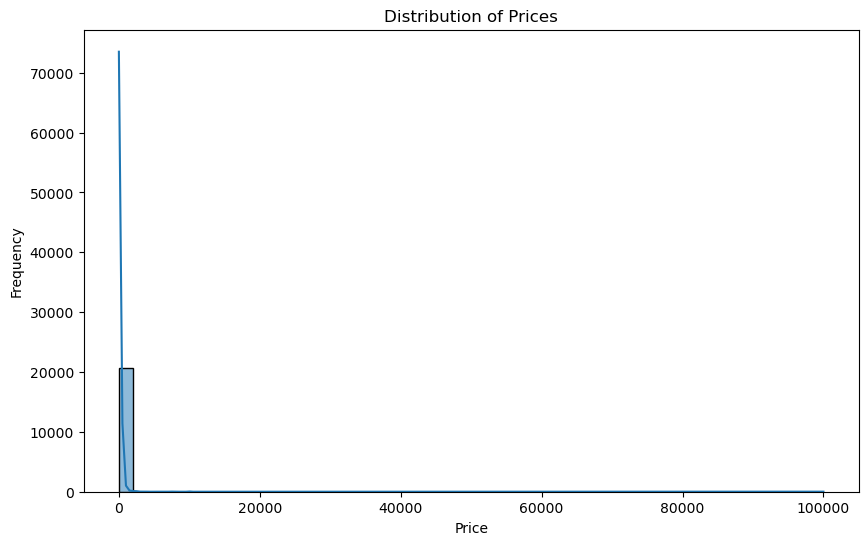

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

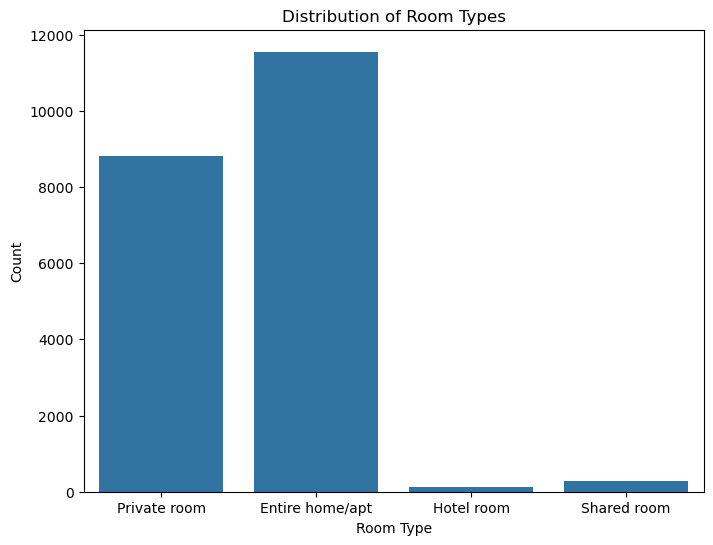

In [16]:
# Room type distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='room_type', data=df)
plt.title('Distribution of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

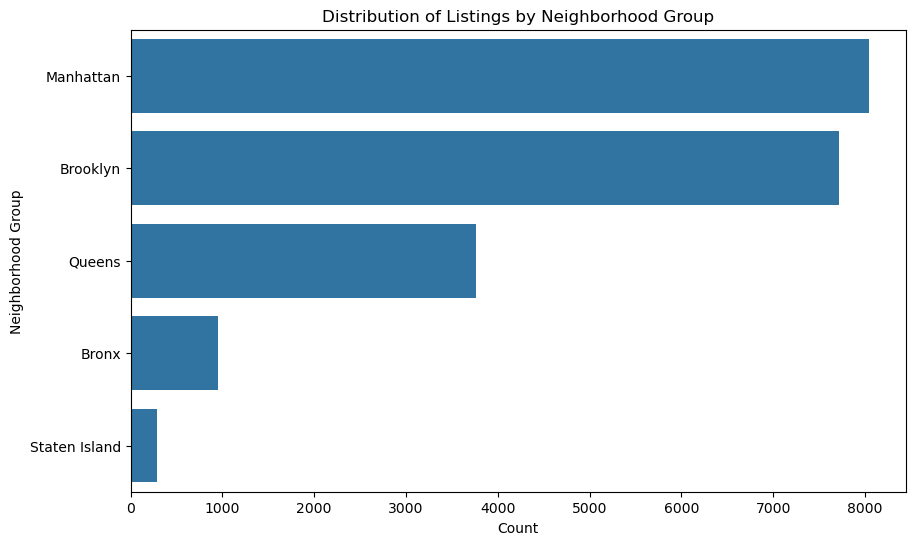

In [17]:
# Neighborhood group distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='neighbourhood_group', data=df, order=df['neighbourhood_group'].value_counts().index)
plt.title('Distribution of Listings by Neighborhood Group')
plt.ylabel('Neighborhood Group')
plt.xlabel('Count')
plt.show()

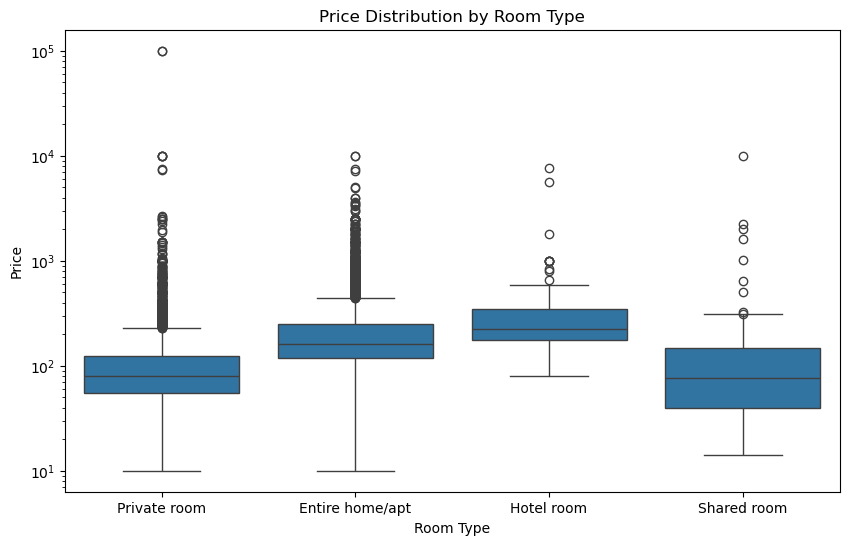

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', data=df)
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.yscale('log')  # Use log scale if price variation is large
plt.show()

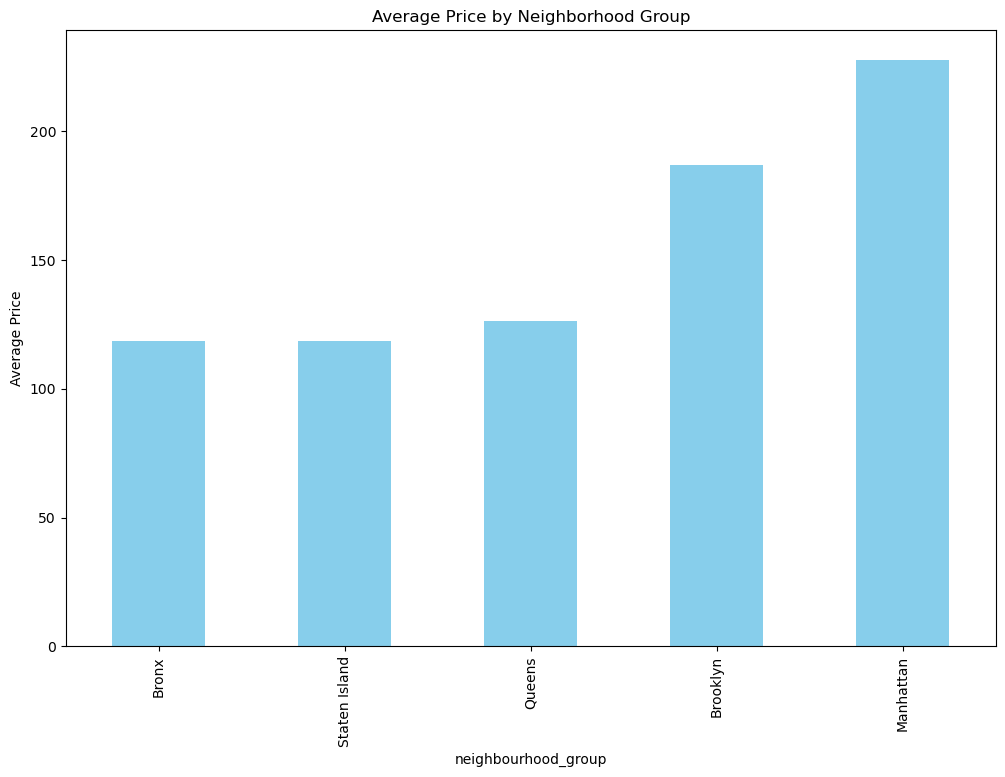

In [19]:
# Average price by neighbourhood group
avg_price_neighbourhood = df.groupby('neighbourhood_group')['price'].mean().sort_values()
plt.figure(figsize=(12, 8))
avg_price_neighbourhood.plot(kind='bar', color='skyblue')
plt.title('Average Price by Neighborhood Group')
plt.ylabel('Average Price')
plt.show()

# Feature Engineering

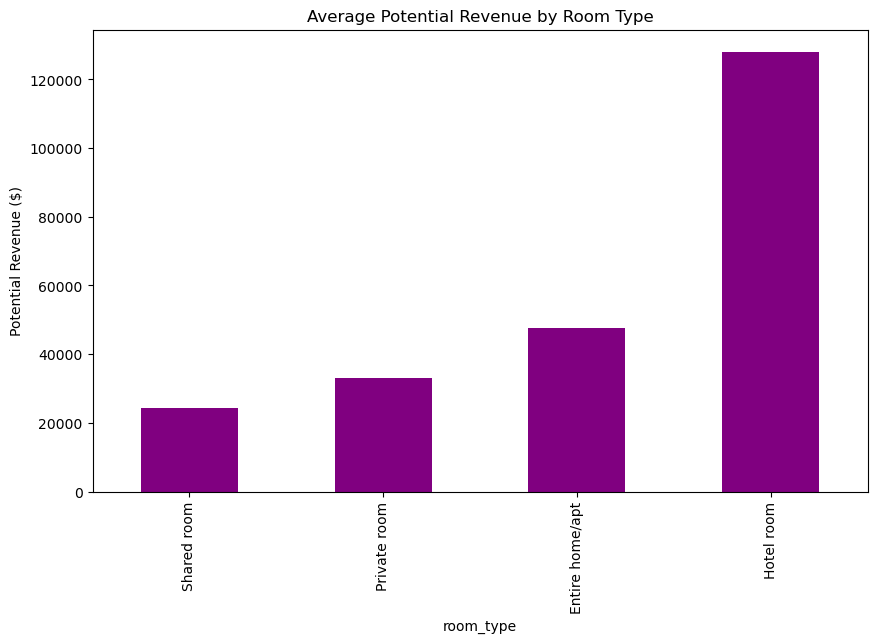

In [20]:
# Potential revenue calculation
df['potential_revenue'] = df['price'] * df['availability_365']

# Average potential revenue by room type
avg_revenue_room_type = df.groupby('room_type')['potential_revenue'].mean().sort_values()
plt.figure(figsize=(10, 6))
avg_revenue_room_type.plot(kind='bar', color='purple')
plt.title('Average Potential Revenue by Room Type')
plt.ylabel('Potential Revenue ($)')
plt.show()

In [21]:
# Pivot table of average prices by neighbourhood and room type
price_pivot = df.pivot_table(values='price', index='neighbourhood', columns='room_type', aggfunc='mean')
print(price_pivot.head())

room_type      Entire home/apt  Hotel room  Private room  Shared room
neighbourhood                                                        
Allerton            119.952381         NaN     72.142857          NaN
Arden Heights       133.750000         NaN           NaN          NaN
Arrochar            109.125000         NaN    166.666667          NaN
Arverne             224.888889         NaN    162.333333         76.0
Astoria             163.125000         NaN     84.237885         96.0


# Summarizing and Visualizing Key Metrics

In [22]:
# Get detailed statistics for prices by neighborhood, including the min, max, and average prices.
neighbourhood_summary = df.groupby('neighbourhood').agg(
    avg_price=('price', 'mean'),
    median_price=('price', 'median'),
    price_std_dev=('price', 'std'),
    min_price=('price', 'min'),
    max_price=('price', 'max')
).sort_values(by='avg_price', ascending=False)

print(neighbourhood_summary.head(10))

                     avg_price  median_price  price_std_dev  min_price  \
neighbourhood                                                            
Tribeca             455.408451         325.0     607.876411       59.0   
Longwood            424.225806          86.0    1777.894517       28.0   
Civic Center        393.750000         262.5     323.399686      100.0   
SoHo                363.507353         230.0     380.741051       70.0   
NoHo                351.333333         210.0     292.776792       95.0   
Theater District    347.257143         194.0     793.541133       63.0   
West Village        341.786730         220.0     476.936171       39.0   
Flatiron District   332.615385         166.0     503.986352       54.0   
Financial District  314.867647         211.5     704.880060       39.0   
DUMBO               312.882353         275.0     216.480912       80.0   

                    max_price  
neighbourhood                  
Tribeca                5000.0  
Longwood       